## Predicting Salary Based on Age with Linear and Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The data set, loosely based on Canadian salary information, is defined in the next cell. Numpy array ages contains the ages of the individual persons in the sample, and corresponding entry in array salaries contains the salary.

In [ ]:
ages = np.array([77,70,16,14,15,41,42,45,46,50,51,35,36,37,16,23,22,16,17,17,25,34,33,30,27,27,28,35,44,40,42,38,38,45,54,48,54,50,55,64,60,55,57,65,68,72,68]).reshape(-1,1)
salaries = np .array([1600,2600,200,0,100,5250,5340,5100,5120,5700,5750,4900,5000,5000,1100,1650,1660,700,600,800,3670,4900,4600,4000,3900,4000,4100,4800,5500,5000,5000,4900,5200,5600,6000,5800,5700,5770,4600,4300,4800,5100,5500,4000,3400,3100,3450])

## Step 1: visualise the data

Visualise the data set by plotting the individual observations (age, salary) pairs as dots in 2D coordinates.


To understand the initial structure, I plotted age vs. salary. The scatter plot revealed a nonlinear trend suggesting salary increases with age but plateaus or declines later.



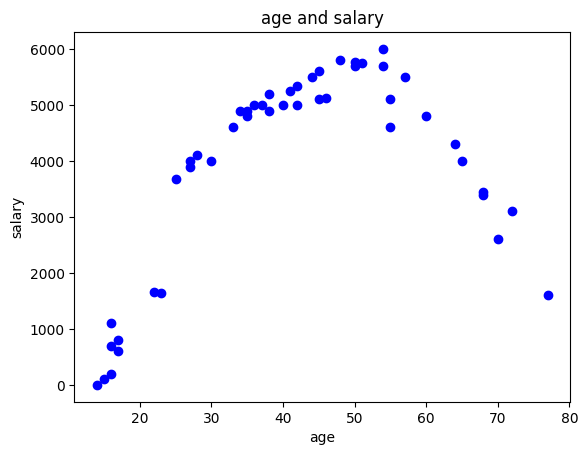

In [ ]:
# your code here
plt.scatter(ages, salaries, color='blue', marker='o')  #plot the data points
plt.title("age and salary")
plt.xlabel("age")
plt.ylabel("salary")
plt.show()

## Step 2: standardise the data

Use sklearn StandardScaler to standardise the data. Standardise only age, dependent variable salary is not standardised. Visualise the data in the same way as in previous step. The plot should look similar, only x-axis scale is changed.



I applied standardization to scale the features. This helps improve model performance, especially for polynomial regression.



In [ ]:
# standardise data (= standardise age, dependent variable is not standardised)
# your code here

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()        #create StandardScaler
ages_standardised = scaler.fit_transform(ages)  #standardise only the ages data
#standardising age data== cause to ( mean=0 , std =1 , datascale==equal)

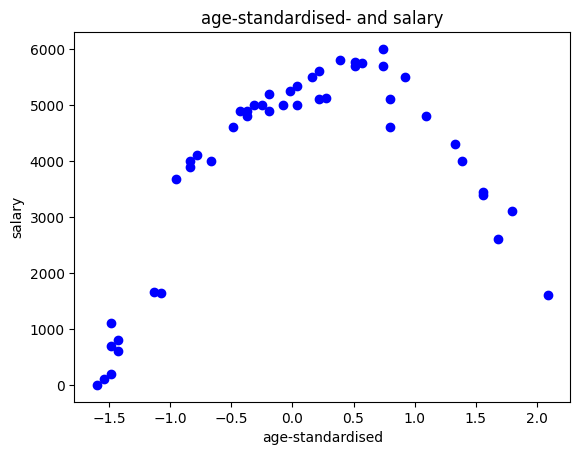

In [ ]:
# make plot of the standardised data
plt.scatter(ages_standardised,salaries,color='blue',marker='o')  #plot standardised ages and salaries
plt.title("age-standardised- and salary")
plt.xlabel("age-standardised")
plt.ylabel("salary")
plt.show()

## Step 3: Divide data into training, validation and test sets

First divide the available data into development and test sets. Use 20% for the test set. Use parameter random_state=42 in train_test_split function to make the split repeatable.

Next, divide the development set further into training and validation sets. Use 30% of the development set for the validation.

Last, visualise training, validation and test sets by plotting them with different colors (for example 'ro', 'bo' and 'go').




In [ ]:
# split data into training and validation (=dev) set and test set
from sklearn.model_selection import train_test_split
# your code here

#1: split the data into development(80%) and test(20%)sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(ages_standardised, salaries, test_size=0.2, random_state=42)

#2: split the development set into training(70%) and validation(30%)sets
X_train, X_val, y_train, y_val = train_test_split(X_train_dev, y_train_dev, test_size=0.3, random_state=42)



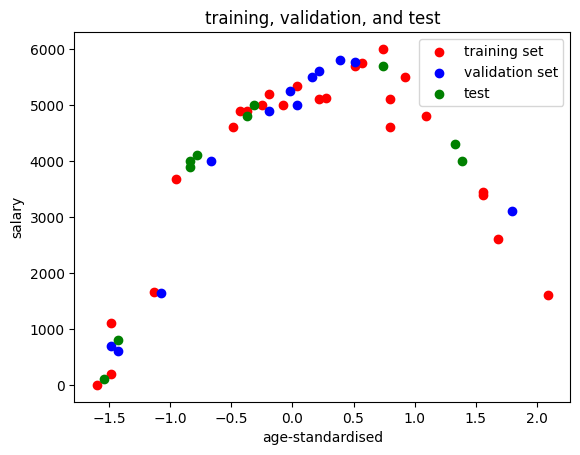

In [ ]:
# plot training, validation and test sets
# your code here

#3: visualize with different colors
plt.scatter(X_train, y_train, color='r', marker='o', label='training set')
plt.scatter(X_val, y_val, color='b', marker='o', label='validation set')
plt.scatter(X_test, y_test, color='g', marker='o', label='test')

plt.title("training, validation, and test")
plt.xlabel("age-standardised")
plt.ylabel("salary")
plt.legend()
plt.show()

## Step 4: Create a linear model

Create linear regression model from the training data and assign the model to variable model_linear.

Plot the training set, validation set and model.

In [ ]:
# create a linear model and plot the model together with training and validation sets
from sklearn.linear_model import LinearRegression

# your code here
#1: create and train the linear model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train) #train the model using the training data

#2: predict values using the model
y_train_pred = model_linear.predict(X_train)
y_val_pred = model_linear.predict(X_val)

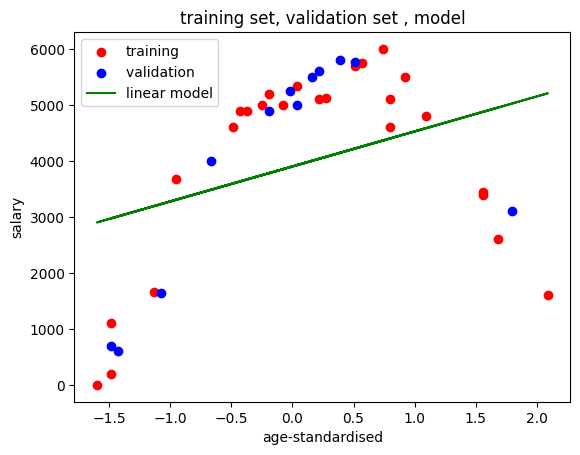

In [ ]:
# plot
# your code here

plt.scatter(X_train, y_train, color='r', marker='o',  label='training') #plot train set
plt.scatter(X_val, y_val, color='b', marker='o', label='validation ')  #plot validation
plt.plot(X_train, y_train_pred, color='green', label='linear model')   #plot model line
plt.title("training set, validation set , model")
plt.xlabel("age-standardised")
plt.ylabel("salary")
plt.legend()
plt.show()

## Step 5: Compute linear regression model score

I evaluated the linear model using R² score. While it captures some variance, the low score suggests it’s not sufficient for this problem.



In [ ]:
# compute validation score (and training score)
# your code here

# Compute r^2 score
train_score = model_linear.score(X_train, y_train)
val_score = model_linear.score(X_val, y_val)
print("training=", train_score)
print("validation=", val_score)

#point=a score close to 1= indicates that the model has performed very well,
#while a score close to 0= suggests that the model has not been able to predict the data accurately

training= 0.13056339923949167
validation= 0.2720581144727887


## Step 6: 3rd order polynomial model

Create 3rd order polynomial model by 1) preprocessing the training data with PolynomialFeatures object, and 2) fitting a model to the polynomial data.

Plot the training set, validation set and model.

Compute the training and validation scores for the polynomial model.

In [ ]:
# fit a 3rd order polynomial to the data
from sklearn.preprocessing import PolynomialFeatures

# preprocess
# your code here
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train) #transform training data to 3rd
X_val_poly = poly_features.transform(X_val) #transform validation data

# create model and fit
# your code here

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = model_poly.predict(X_plot_poly)

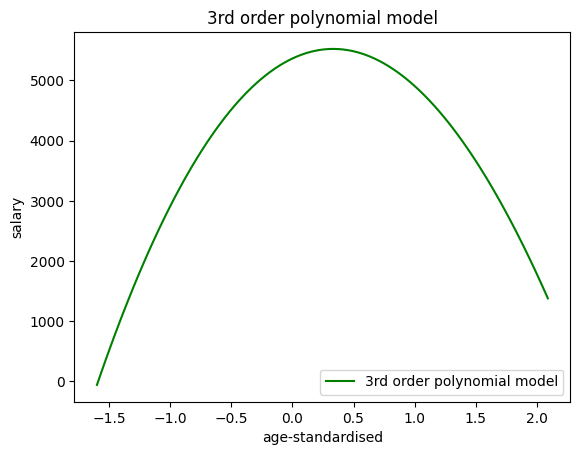

In [ ]:
# plot
# your code here
plt.plot(X_plot, y_plot_poly, color='green', label='3rd order polynomial model')  # polynomial model curve (green)

plt.title("3rd order polynomial model")
plt.xlabel("age-standardised")
plt.ylabel("salary")
plt.legend()
plt.show()


In [ ]:
# compute validation score (and training score)
# your code here

train_score_poly = model_poly.score(X_train_poly, y_train)
val_score_poly = model_poly.score(X_val_poly, y_val)

print("training score", train_score_poly)
print("validation score", val_score_poly)

training score 0.9580433634281189
validation score 0.9613780343583749


## Step 7: Train the final model and verify it

Pick the better of the two models (based on validation scores), recreate the model object and fit it with all development data. Assign the result to variable final_model.

Compute score for the final model using test set. Is the result acceptable?

In [ ]:
# train polynomial model with all development data and verify performance with test set
# your code here

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Apply PolynomialFeatures transformation to training and validation data for polynomial model
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)  # Transform training data to polynomial features
X_val_poly = poly_features.transform(X_val)  # Transform validation data to polynomial features

# Create polynomial model and fit it with transformed training data
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Compute validation scores for each model
val_score_linear = model_linear.score(X_val, y_val)  # For linear model, no transformation needed
val_score_poly = model_poly.score(X_val_poly, y_val)  # For polynomial model, use transformed validation data

# Select the model with the better validation score
if val_score_poly > val_score_linear:
    final_model = model_poly  # Choose polynomial model
    print("Polynomial model selected as the final model based on validation score")
    X_train_val_poly = poly_features.fit_transform(np.vstack((X_train, X_val)))  # Transform all development data to polynomial
    final_model.fit(X_train_val_poly, np.hstack((y_train, y_val)))  # Train on all development data
    # Transform test data for polynomial model
    X_test_poly = poly_features.transform(X_test)
    test_score = final_model.score(X_test_poly, y_test)  # Evaluate model on test data
else:
    final_model = model_linear  # Choose linear model
    final_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)))  # Train on all development data
    test_score = final_model.score(X_test, y_test)  # Evaluate model on test data
    print("Linear model selected as the final model based on validation score")

# compute validation score (and training score)
# your code here

# Print final model test score
print("Final model test score:", test_score)



Polynomial model selected as the final model based on validation score
Final model test score: 0.9617447637281689


## Step 8: Make predictions and reflect

Use the model to predict salary for the following ages: 24, 46, 66, 5, 89. What do you think about the results? In what age range does the model give sensible predictions? (Remember to scale the ages using the same scaler you used for scaling the training data).

In [ ]:
myages = np.array([24, 46, 66, 5, 89])
# your code here
from sklearn.preprocessing import PolynomialFeatures

myages = np.array([24, 46, 66, 5, 89]).reshape(-1, 1)
myages_scaled = scaler.transform(myages)
if final_model == model_poly:
    poly_features = PolynomialFeatures(degree=3)
    myages_scaled_poly = poly_features.fit_transform(myages_scaled)
    predicted_salaries = final_model.predict(myages_scaled_poly)
else:
    predicted_salaries = final_model.predict(myages_scaled)

print("predicted salaries for ages 24, 46, 66, 5, and 89=", predicted_salaries)

predicted salaries for ages 24, 46, 66, 5, and 89= [ 2716.25587404  5513.52782932  3943.57129347 -3547.45906081
 -2658.86270478]





### The model has performed well in predicting salaries for reasonable ages (such as 24, 46 and 66).
For unusual ages (such as 5 or 89 years), the predictions are inaccurate and irrational, indicating the limitations of the model in predicting for values ​​far from the training data.